# Setup

## Install ucimlrepo package to load the dataset

In [ ]:
!pip install ucimlrepo

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Data Loading
- dataset link: [click here!](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)
- ucirepo has a fetch method that returns a pandas dataframe of the dataset called fetch_ucirepo(id)
- to get the dataset id
  * go to the dataset link
  * click the "import in python" button and copy the code in python notebook
  * or check the url after the word "dataset/"

- ucirepo returns the dataset at data object
- inside the data object listed the features, targets, and original

In [ ]:
from ucimlrepo import fetch_ucirepo
concrete_compressive_strength = fetch_ucirepo(id=165)

concrete_data = concrete_compressive_strength.data.original
concrete_data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Data Understanding

- dataset link: [click here!](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)

## EDA - Variable Description


Variable Description
* Features : the component used for the concrete mixture
    1. Cement (component 1): Numerical value representing the amount of cement in kilograms in a cubic meter mixture.
    2. Blast Furnace Slag (component 2): Numerical value representing the amount of blast furnace slag in kilograms in a cubic meter mixture.
    3. Fly Ash (component 3): Numerical value representing the amount of fly ash in kilograms in a cubic meter mixture.
    4. Water (component 4): Numerical value representing the amount of water in kilograms in a cubic meter mixture.
    5. Superplasticizer (component 5): Numerical value representing the amount of superplasticizer in kilograms in a cubic meter mixture.
    6. Coarse Aggregate (component 6): Numerical value representing the amount of coarse aggregate in kilograms in a cubic meter mixture.
    7. Fine Aggregate (component 7): Numerical value representing the amount of fine aggregate in kilograms in a cubic meter mixture.
    8. Age: Numerical value representing the age of the concrete in days (1 to 365).

* Target:
  - Concrete Compressive Strength: Numerical value representing the compressive strength of the concrete in megapascals (MPa).


### Check dataset sample

In [ ]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### Check for missing values
> assumption: the 0's means that component wasn't used for the mixture

In [ ]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## EDA - Check for Outliers

### Check for outliers from each feature

<Axes: xlabel='Cement'>

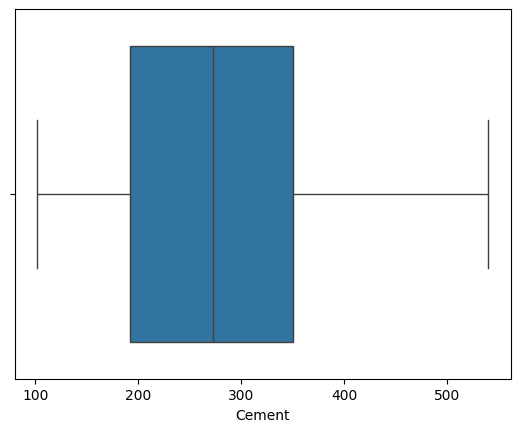

In [ ]:
sns.boxplot(x=concrete_data['Cement'])

<Axes: xlabel='Blast Furnace Slag'>

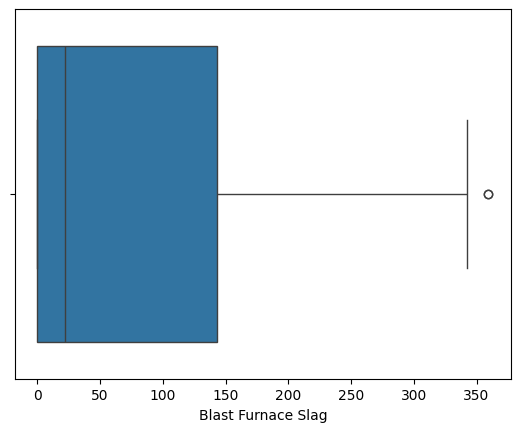

In [ ]:
sns.boxplot(x=concrete_data['Blast Furnace Slag'])

<Axes: xlabel='Fly Ash'>

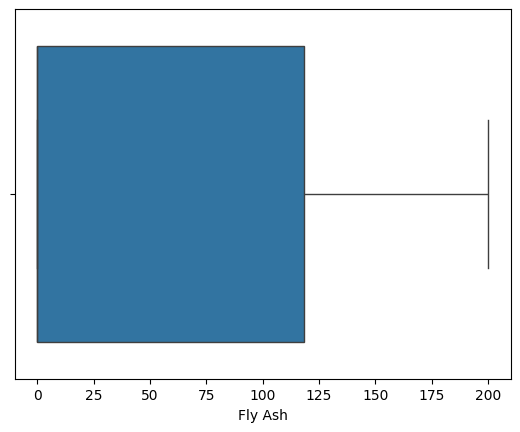

In [ ]:
sns.boxplot(x=concrete_data['Fly Ash'])

<Axes: xlabel='Water'>

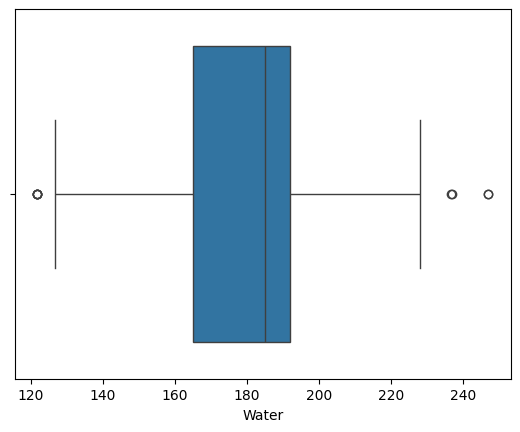

In [ ]:
sns.boxplot(x=concrete_data['Water'])

<Axes: xlabel='Superplasticizer'>

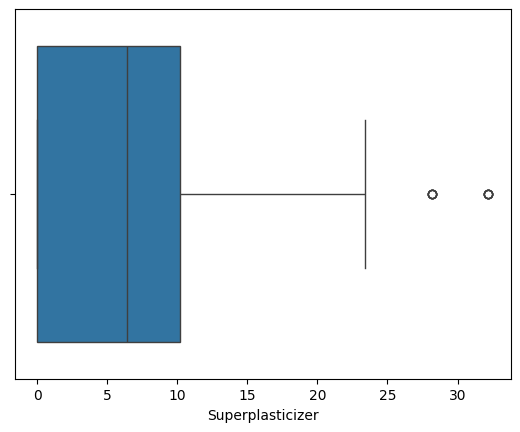

In [ ]:
sns.boxplot(x=concrete_data['Superplasticizer'])

<Axes: xlabel='Coarse Aggregate'>

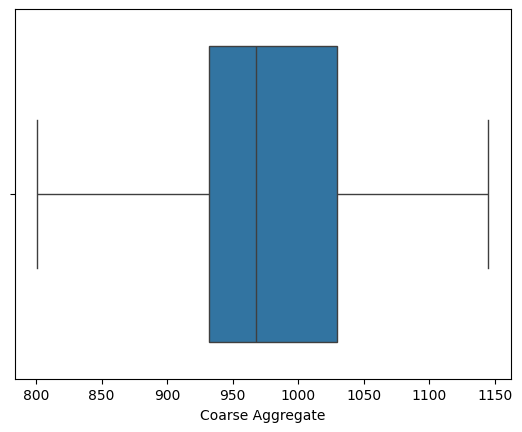

In [ ]:
sns.boxplot(x=concrete_data['Coarse Aggregate'])

<Axes: xlabel='Fine Aggregate'>

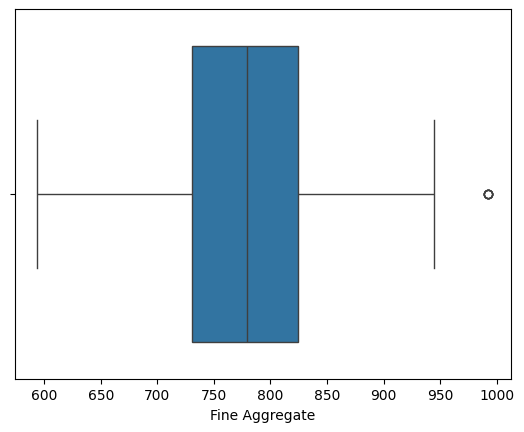

In [ ]:
sns.boxplot(x=concrete_data['Fine Aggregate'])

<Axes: xlabel='Age'>

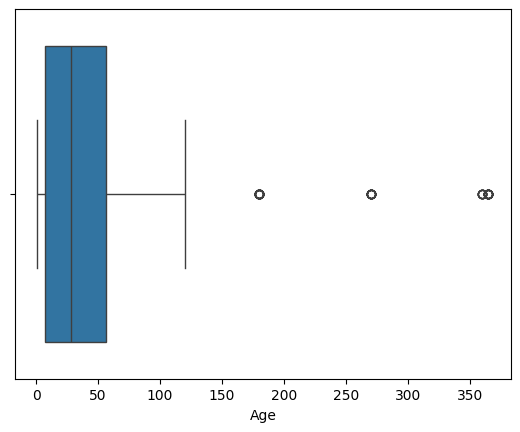

In [ ]:
sns.boxplot(x=concrete_data['Age'])

### Handle Outliers
- there are a few outliers that need to be cleaned
- using IQR method to clean outliers

In [ ]:
Q1 = concrete_data.quantile(0.25, numeric_only=True)
Q3 = concrete_data.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1
left_Q1, right_Q1 = concrete_data.align((Q1 - 1.5 * IQR), axis=1, copy=False)
left_Q3, right_Q3 = concrete_data.align((Q3 + 1.5 * IQR), axis=1, copy=False)
concrete_data = concrete_data[~((left_Q1 < right_Q1) | (left_Q3 > right_Q3)).any(axis=1)]

concrete_data.shape

(941, 9)

## EDA - Univariate Analysis

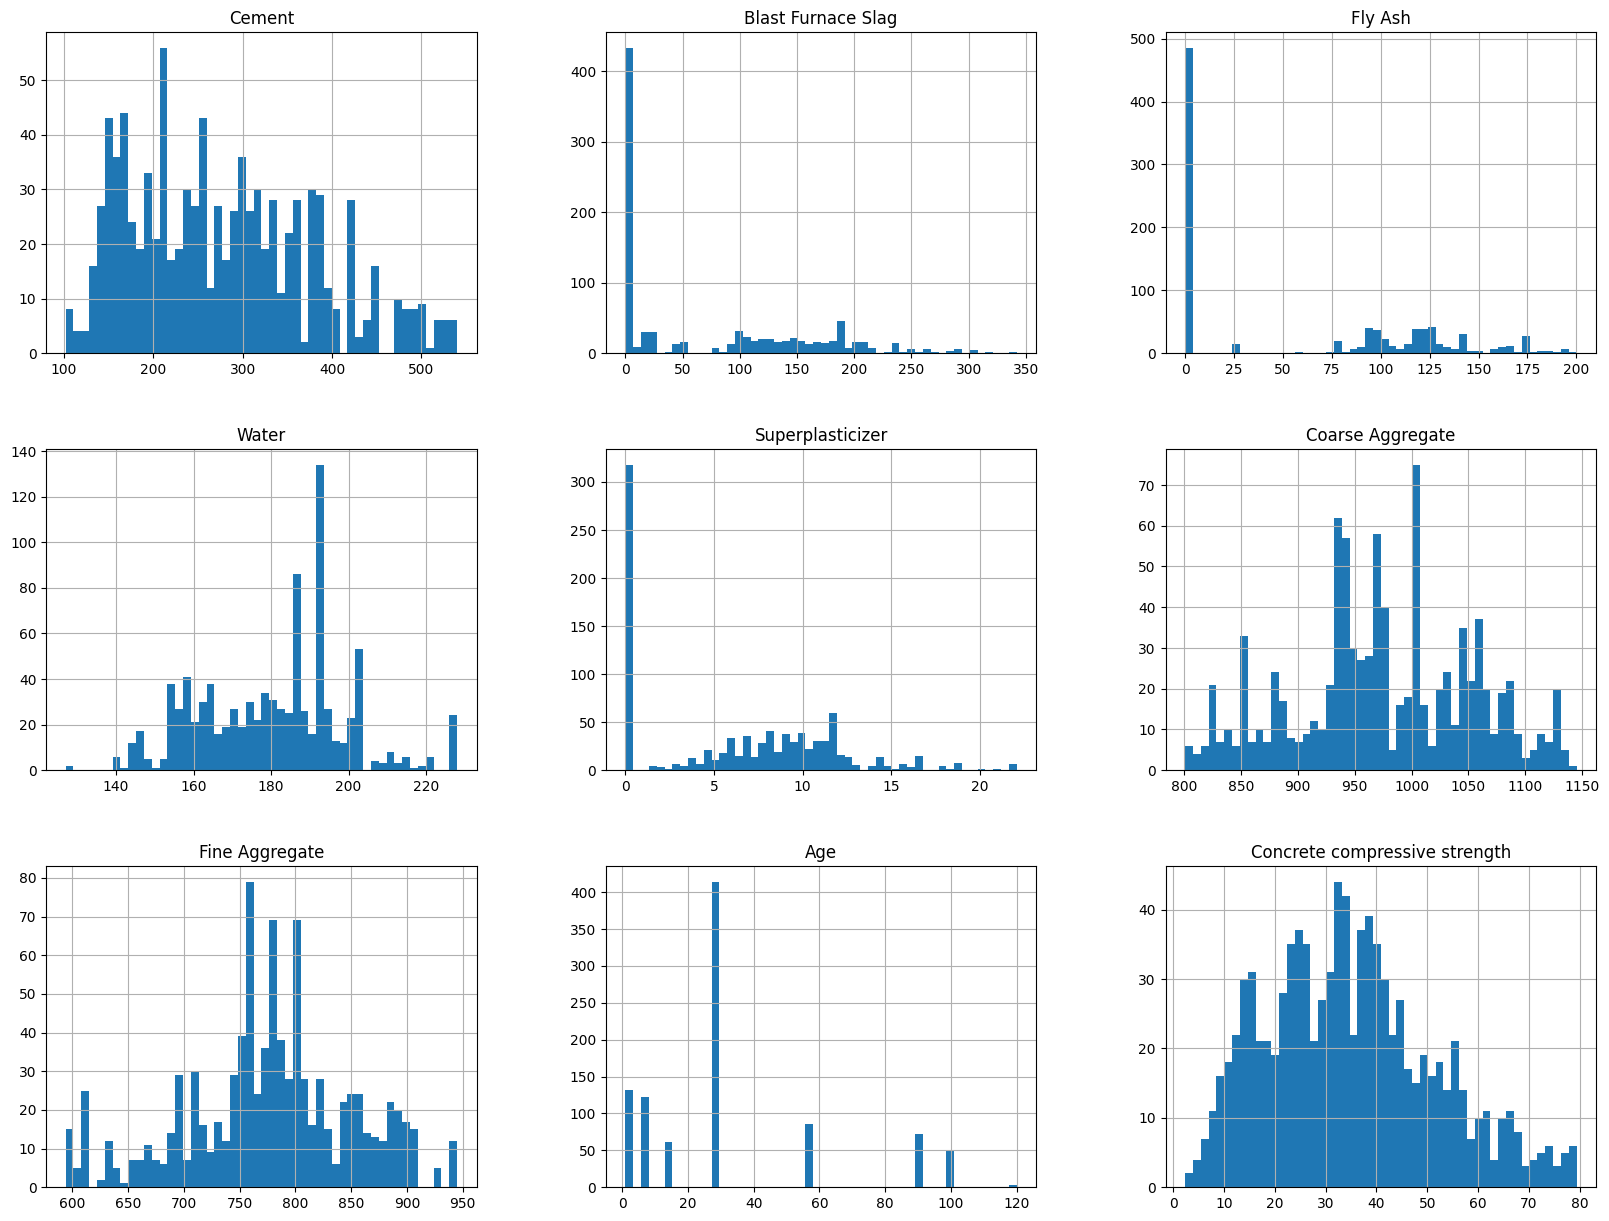

In [ ]:
concrete_data.hist(bins=50, figsize=(20,15))
plt.show()

## EDA - Multivariate Analysis
- analize the correlation between the concrete compressive strength with other features

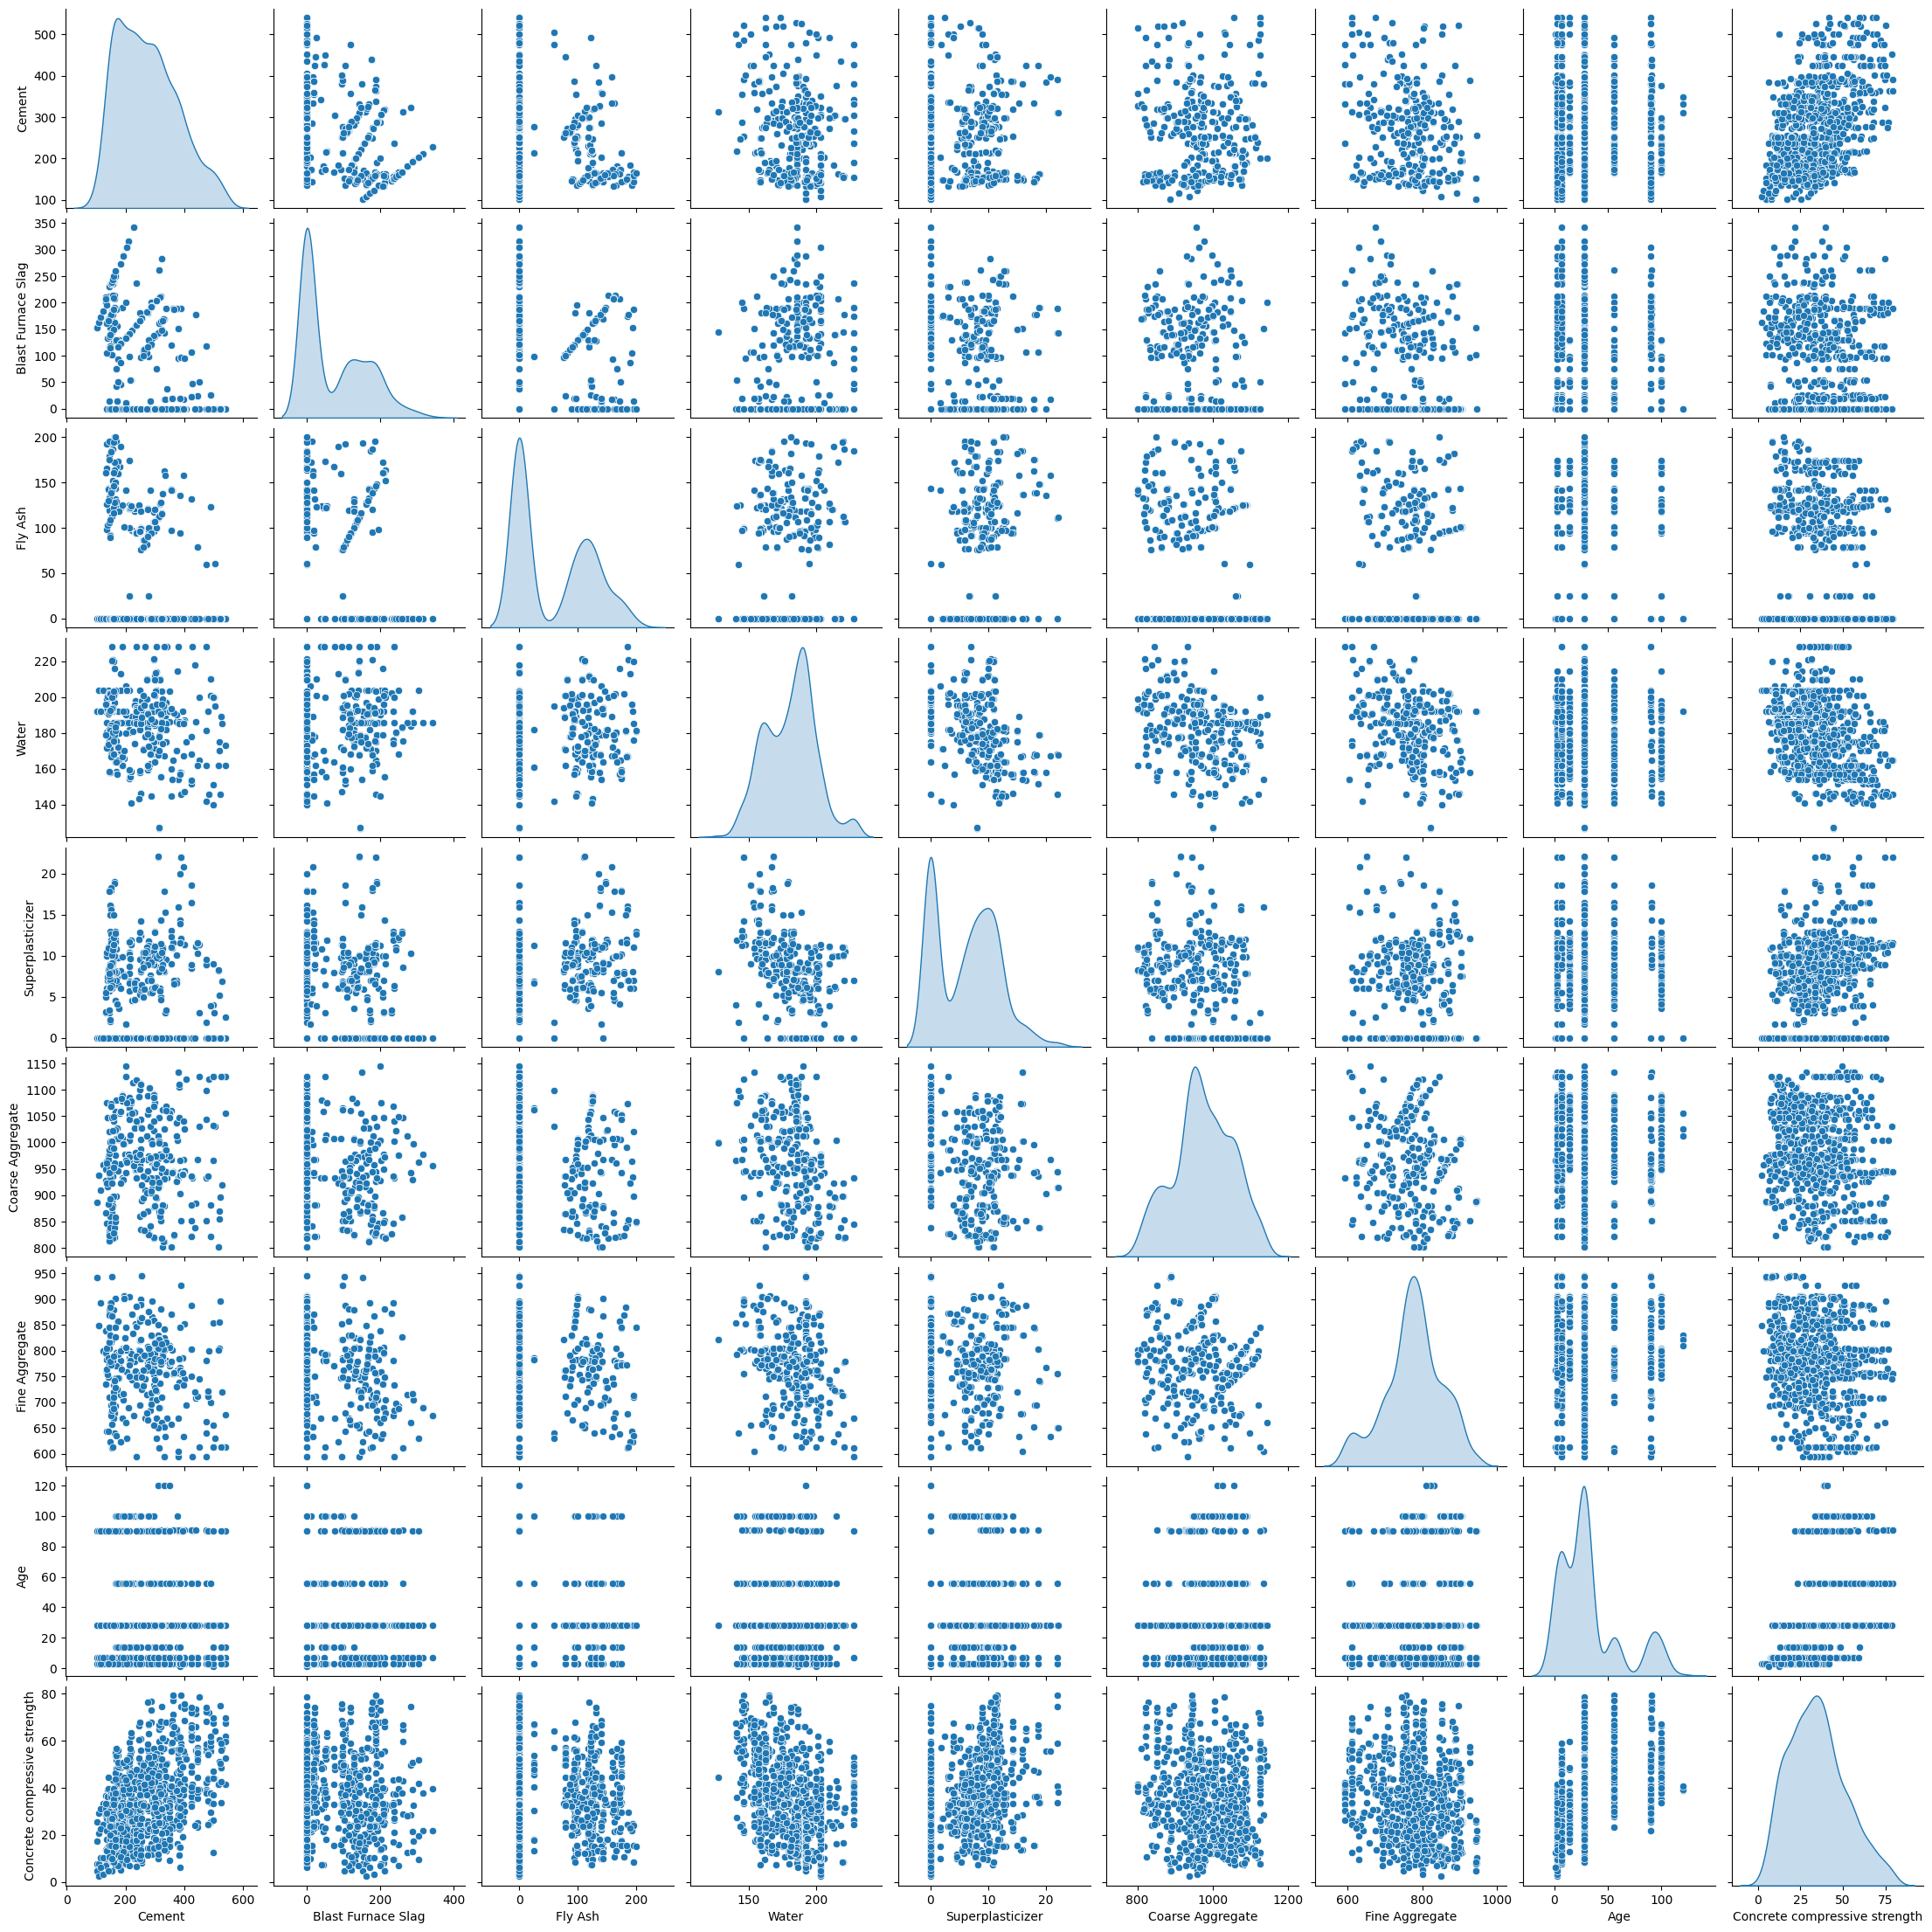

In [ ]:
sns.pairplot(concrete_data, diag_kind='kde')

### Evaluate Correlation Score

Text(0.5, 1.0, 'Correlation Matrix for Numerical Features')

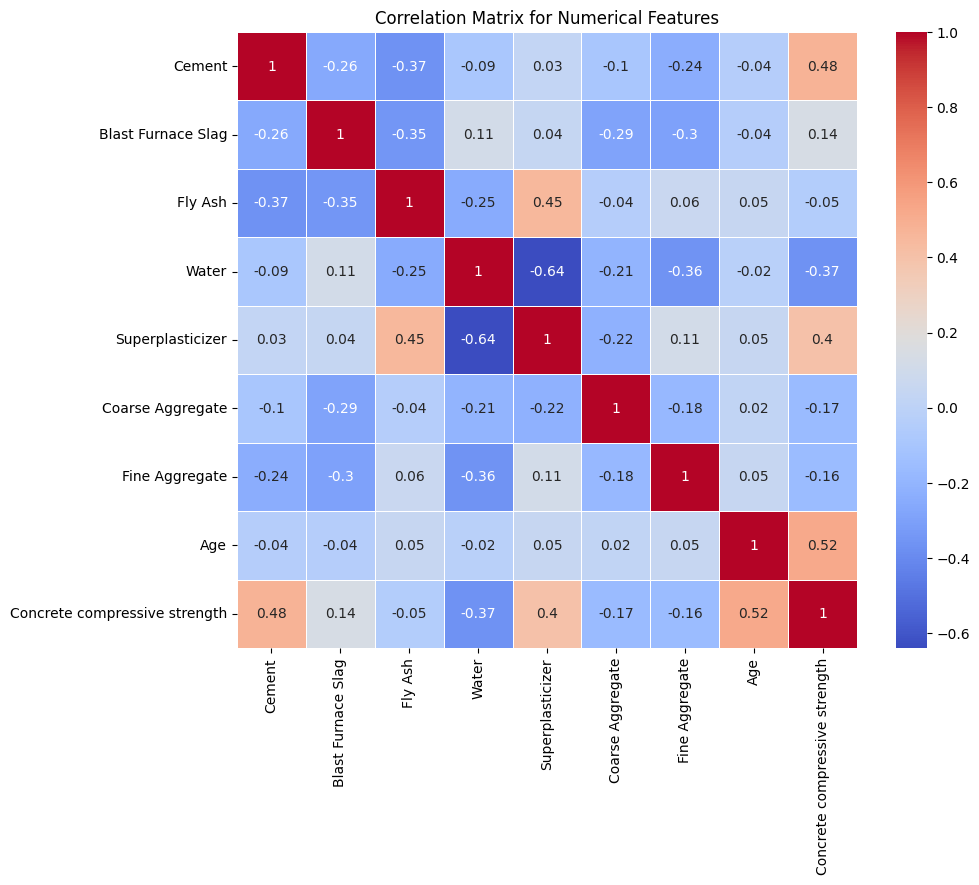

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix = concrete_data.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Matrix for Numerical Features")

# Data Preparation
- split features and target
- split into train and test
- standardization

## Split Features and Target

In [ ]:
X = concrete_data.drop(['Concrete compressive strength'], axis=1)
y = concrete_data['Concrete compressive strength']

## Split into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [ ]:
print(f"Total # of samples in dataset: {len(X)}")
print(f"Total # of samples in train dataset: {len(X_train)}")
print(f"Total # of samples in test dataset: {len(X_test)}")

Total # of samples in dataset: 941
Total # of samples in train dataset: 752
Total # of samples in test dataset: 189


## Standardization

- when using StandardScaler the dataframe will change into numpy.ndarray
- to prevent this simply store the index and columns
- and then create a dataframe using those index and columns combined with the scaled data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

index, columns = X_train.index, X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, index=index, columns=columns)
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
633,-0.053665,-0.841567,-0.889020,0.147648,-1.156957,1.457450,0.410171,-0.863334
540,1.935269,-0.841567,-0.889020,0.630882,-1.156957,-0.488740,-0.867795,-1.008065
186,-0.563996,-0.841567,0.616255,0.485911,-0.318740,-0.092579,1.241250,-0.103496
988,-1.231502,0.847470,0.859092,2.139645,0.724374,-0.655410,-1.592155,-0.103496
373,-0.597954,-0.841567,1.042776,-1.167822,0.947899,1.338217,0.235418,2.501662


In [ ]:
X_train.describe().round(4)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,752.0000,752.0000,752.0000,752.0000,752.0000,752.0000,752.0000,752.0000
mean,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000
std,1.0007,1.0007,1.0007,1.0007,1.0007,1.0007,1.0007,1.0007
min,-1.7321,-0.8416,-0.8890,-2.8591,-1.1570,-2.2221,-2.4446,-1.0804
25%,-0.8444,-0.8416,-0.8890,-0.8242,-1.1570,-0.5426,-0.4893,-0.8633
50%,-0.0527,-0.6073,-0.8890,0.1476,0.1283,-0.0810,0.0447,-0.1035
75%,0.6861,0.8276,0.9537,0.6309,0.7803,0.7331,0.6056,-0.1035
max,2.5174,3.1655,2.2258,2.5638,2.9596,2.1882,2.2377,3.2253


# Modelling

Algorithm used :
- K-Nearest Neighbor
- Support Vector Regression
- Random Forest
- Boosting

## Root Mean Squared Error function

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(y_pred, y_true):
  return np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_true))

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

result = rmse(y_pred=knn.predict(X_train), y_true=y_train)
result

6.35647923038098

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

result = rmse(y_pred=svr.predict(X_train), y_true=y_train)
result

8.290605396226104

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=16, max_depth=8, random_state=69, n_jobs=-1)
rf.fit(X_train, y_train)

result = rmse(y_pred=rf.predict(X_train), y_true=y_train)
result

3.3298669621649015

## XGBoost | Extreme Gradient Boosting

In [ ]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=16,
    max_depth=8,
    learning_rate=0.3,
    subsample=0.5,
    colsample_bytree=0.5
)

xgbr.fit(X_train, y_train)

result = rmse(y_pred=xgbr.predict(X_train), y_true=y_train)
result

2.8572794232070446

# Model Evaluation

### scale the X_test using standardscaler

In [ ]:
t_index, t_columns = X_test.index, X_test.columns

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, index=t_index, columns=t_columns)
X_test.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
418,-0.282635,-0.841567,0.952491,0.679205,-0.076589,0.888209,-0.306184,-1.008065
777,0.567271,-0.841567,-0.889020,0.255033,-1.156957,1.213856,-0.310186,-0.103496
176,0.960206,0.929462,-0.889020,-1.414809,1.804743,2.051051,-2.297838,2.176017
481,1.605397,-0.560451,0.340729,-0.979898,1.003780,-0.093861,-0.870463,0.909621
435,-1.097613,0.679972,1.112825,-0.255047,0.295952,0.409995,-0.408901,-0.103496


### define a dataframe to evaluate model

In [ ]:
model_result = pd.DataFrame(columns=['train_rmse', 'test_rmse'], index=['KNN', 'SVR', 'RF', 'XGR'])

### iterate over each model to get rmse of train and test

In [ ]:
model_dict = {
    'KNN': knn,
    'SVR': svr,
    'RF': rf,
    'XGR': xgbr
}

for name, model in model_dict.items():
  model_result.loc[name, 'train_rmse'] = rmse(y_pred=model.predict(X_train), y_true=y_train)
  model_result.loc[name, 'test_rmse'] = rmse(y_pred=model.predict(X_test), y_true=y_test)

model_result

,train_rmse,test_rmse
KNN,6.356479,7.825455
SVR,8.290605,8.360327
RF,3.329867,5.268821
XGR,2.857279,4.971411


### plot the rmse

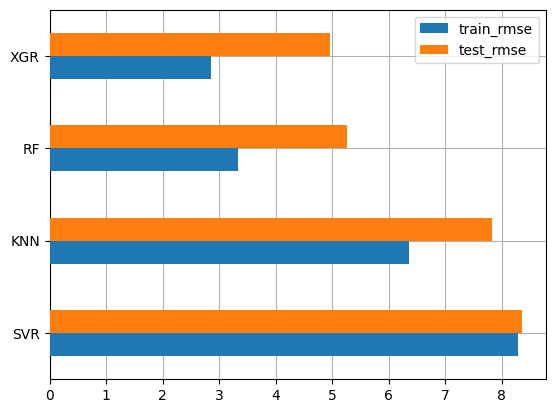

In [ ]:
fig, ax = plt.subplots()
model_result.sort_values(by='test_rmse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### Try predicting using all model

In [ ]:
prediction = X_test.iloc[:10].copy()
pred_dict = {'y_true': y_test[:10]}

for name, model in model_dict.items():
  pred_dict[name+'_prediction'] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)

,y_true,KNN_prediction,SVR_prediction,RF_prediction,XGR_prediction
418,11.98,18.5,17.6,14.1,14.500000
777,31.84,32.0,28.1,35.0,32.099998
176,56.50,60.8,45.8,58.5,58.099998
481,61.07,52.4,57.1,54.9,60.500000
435,41.20,35.6,31.0,40.2,36.500000
53,49.19,48.4,40.8,48.1,53.900002
904,23.79,34.6,29.8,25.6,33.700001
266,38.50,27.3,29.9,33.5,32.099998
999,15.57,21.6,27.7,15.8,16.900000
380,57.23,61.7,43.3,60.8,66.699997


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
for name, model in model_dict.items():
       model_result.loc[name, 'train_r2'] = r2_score(y_train, model.predict(X_train))
       model_result.loc[name, 'test_r2'] = r2_score(y_test, model.predict(X_test))

In [ ]:
print(model_result)

    train_rmse test_rmse  train_r2   test_r2
KNN   6.356479  7.825455  0.855178  0.763742
SVR   8.290605  8.360327  0.753637  0.730341
RF    3.329867  5.268821  0.960257  0.892899
XGR   2.857279  4.971411  0.970738  0.904649


In [ ]:
from sklearn.metrics import r2_score
model_dict = {
    'KNN': knn,
    'SVR': svr,
    'RF': rf,
    'XGR': xgbr
}

for name, model in model_dict.items():
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))
    print(f'{name} - Train R-squared: {train_r2:.4f}, Test R-squared: {test_r2:.4f}')

KNN - Train R-squared: 0.8552, Test R-squared: 0.7637
SVR - Train R-squared: 0.7536, Test R-squared: 0.7303
RF - Train R-squared: 0.9603, Test R-squared: 0.8929
XGR - Train R-squared: 0.9707, Test R-squared: 0.9046
